# Построение схемы метро с дополнительными условиями

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import json
import pandas as pd
import seaborn as sns

from networkx.algorithms.approximation import traveling_salesman_problem

## Задания № 1-3

1.	Построить граф метро большого города (агломерации). Граф размерностью не менее 100 вершин. При этом считать за одну вершину пересадочные станции. А таже для решения задачи предполагаются, что поезда могут двигаться между любой парой вершин. Из рассмотрения исключается время, затрачиваемое пассажирами, на переходы между станциями метро.
2.	Взвесить ребра графа в соответствии с временем прохождения поездов между станциями.
3.	Визуализировать граф метро, пометив его вершины.

Обрабатываем данные из источника GitHub для отрисовки метро Санкт-Петербурга

In [3]:
all_stations = {"station": []}

with open("./stations.json", "r") as f:
    metro_stations = json.load(f)


for line in metro_stations:
    for each_station in line["stations"]:
        all_stations["station"].append(each_station)
all_stations

{'station': [{'name': 'Девяткино', 'latlon': [60.050251, 30.442809]},
  {'name': 'Гражданский проспект', 'latlon': [60.034915, 30.418276]},
  {'name': 'Академическая', 'latlon': [60.012719, 30.396133]},
  {'name': 'Политехническая', 'latlon': [60.008815, 30.370908]},
  {'name': 'Площадь Мужества', 'latlon': [59.999615, 30.366497]},
  {'name': 'Лесная', 'latlon': [59.984769, 30.344354]},
  {'name': 'Выборгская', 'latlon': [59.971024, 30.347345]},
  {'name': 'Площадь Ленина', 'latlon': [59.955723, 30.356014]},
  {'name': 'Чернышевская', 'latlon': [59.944436, 30.359975]},
  {'name': 'Площадь Восстания', 'latlon': [59.931517, 30.360559]},
  {'name': 'Владимирская', 'latlon': [59.927455, 30.348225]},
  {'name': 'Пушкинская', 'latlon': [59.920614, 30.329864]},
  {'name': 'Технологический институт – 1', 'latlon': [59.916342, 30.318545]},
  {'name': 'Балтийская', 'latlon': [59.907135, 30.299519]},
  {'name': 'Нарвская', 'latlon': [59.901111, 30.275004]},
  {'name': 'Кировский завод', 'latlon':

In [4]:
len(all_stations["station"])

72

In [5]:
# Добавление рёбер
metro_edges = []

for line in metro_stations:
    for i in range(len(line["stations"]) - 1):
        metro_edges.append([line["stations"][i]["name"], line["stations"][i + 1]["name"]])

metro_edges

[['Девяткино', 'Гражданский проспект'],
 ['Гражданский проспект', 'Академическая'],
 ['Академическая', 'Политехническая'],
 ['Политехническая', 'Площадь Мужества'],
 ['Площадь Мужества', 'Лесная'],
 ['Лесная', 'Выборгская'],
 ['Выборгская', 'Площадь Ленина'],
 ['Площадь Ленина', 'Чернышевская'],
 ['Чернышевская', 'Площадь Восстания'],
 ['Площадь Восстания', 'Владимирская'],
 ['Владимирская', 'Пушкинская'],
 ['Пушкинская', 'Технологический институт – 1'],
 ['Технологический институт – 1', 'Балтийская'],
 ['Балтийская', 'Нарвская'],
 ['Нарвская', 'Кировский завод'],
 ['Кировский завод', 'Автово'],
 ['Автово', 'Ленинский проспект'],
 ['Ленинский проспект', 'Проспект Ветеранов'],
 ['Парнас', 'Проспект Просвещения'],
 ['Проспект Просвещения', 'Озерки'],
 ['Озерки', 'Удельная'],
 ['Удельная', 'Пионерская'],
 ['Пионерская', 'Чёрная речка'],
 ['Чёрная речка', 'Петроградская'],
 ['Петроградская', 'Горьковская'],
 ['Горьковская', 'Невский проспект'],
 ['Невский проспект', 'Сенная площадь'],
 ['С

In [7]:
all_stations["station"][45]["latlon"]

[59.877253, 30.441812]

Добавляем пересадки

In [8]:
exchanges = [["Невский проспект", "Гостиный двор"], ["Площадь Восстания", "Маяковская"],
             ["Достоевская", "Владимирская"], ["Площадь Александра Невского – 1", "Площадь Александра Невского"],
             ['Спасская', 'Садовая'], ['Сенная площадь', 'Садовая'], ['Сенная площадь', 'Садовая'], ["Звенигородская", "Пушкинская"],
             ["Технологический институт – 1", "Технологический институт – 2"]]

metro_edges.extend(exchanges)

In [10]:
metro_edges

[['Девяткино', 'Гражданский проспект'],
 ['Гражданский проспект', 'Академическая'],
 ['Академическая', 'Политехническая'],
 ['Политехническая', 'Площадь Мужества'],
 ['Площадь Мужества', 'Лесная'],
 ['Лесная', 'Выборгская'],
 ['Выборгская', 'Площадь Ленина'],
 ['Площадь Ленина', 'Чернышевская'],
 ['Чернышевская', 'Площадь Восстания'],
 ['Площадь Восстания', 'Владимирская'],
 ['Владимирская', 'Пушкинская'],
 ['Пушкинская', 'Технологический институт – 1'],
 ['Технологический институт – 1', 'Балтийская'],
 ['Балтийская', 'Нарвская'],
 ['Нарвская', 'Кировский завод'],
 ['Кировский завод', 'Автово'],
 ['Автово', 'Ленинский проспект'],
 ['Ленинский проспект', 'Проспект Ветеранов'],
 ['Парнас', 'Проспект Просвещения'],
 ['Проспект Просвещения', 'Озерки'],
 ['Озерки', 'Удельная'],
 ['Удельная', 'Пионерская'],
 ['Пионерская', 'Чёрная речка'],
 ['Чёрная речка', 'Петроградская'],
 ['Петроградская', 'Горьковская'],
 ['Горьковская', 'Невский проспект'],
 ['Невский проспект', 'Сенная площадь'],
 ['С

In [9]:
for station in all_stations["station"]:
    print(station["latlon"])

[60.050251, 30.442809]
[60.034915, 30.418276]
[60.012719, 30.396133]
[60.008815, 30.370908]
[59.999615, 30.366497]
[59.984769, 30.344354]
[59.971024, 30.347345]
[59.955723, 30.356014]
[59.944436, 30.359975]
[59.931517, 30.360559]
[59.927455, 30.348225]
[59.920614, 30.329864]
[59.916342, 30.318545]
[59.907135, 30.299519]
[59.901111, 30.275004]
[59.879638, 30.26196]
[59.867308, 30.261403]
[59.851774, 30.268428]
[59.84211, 30.250588]
[60.066971, 30.333996]
[60.05141, 30.332541]
[60.037131, 30.321878]
[60.016721, 30.315886]
[60.002517, 30.296662]
[59.985512, 30.30083]
[59.966498, 30.31143]
[59.956147, 30.318833]
[59.935579, 30.327025]
[59.926972, 30.320458]
[59.9166, 30.318779]
[59.906179, 30.31753]
[59.891494, 30.31797]
[59.879164, 30.318716]
[59.866269, 30.321887]
[59.848873, 30.321483]
[59.833154, 30.349321]
[59.829328, 30.375588]
[59.98778, 30.202501]
[59.971879, 30.211942]
[59.948456, 30.234633]
[59.942525, 30.278247]
[59.933947, 30.333664]
[59.931413, 30.355232]
[59.924285, 30.385218

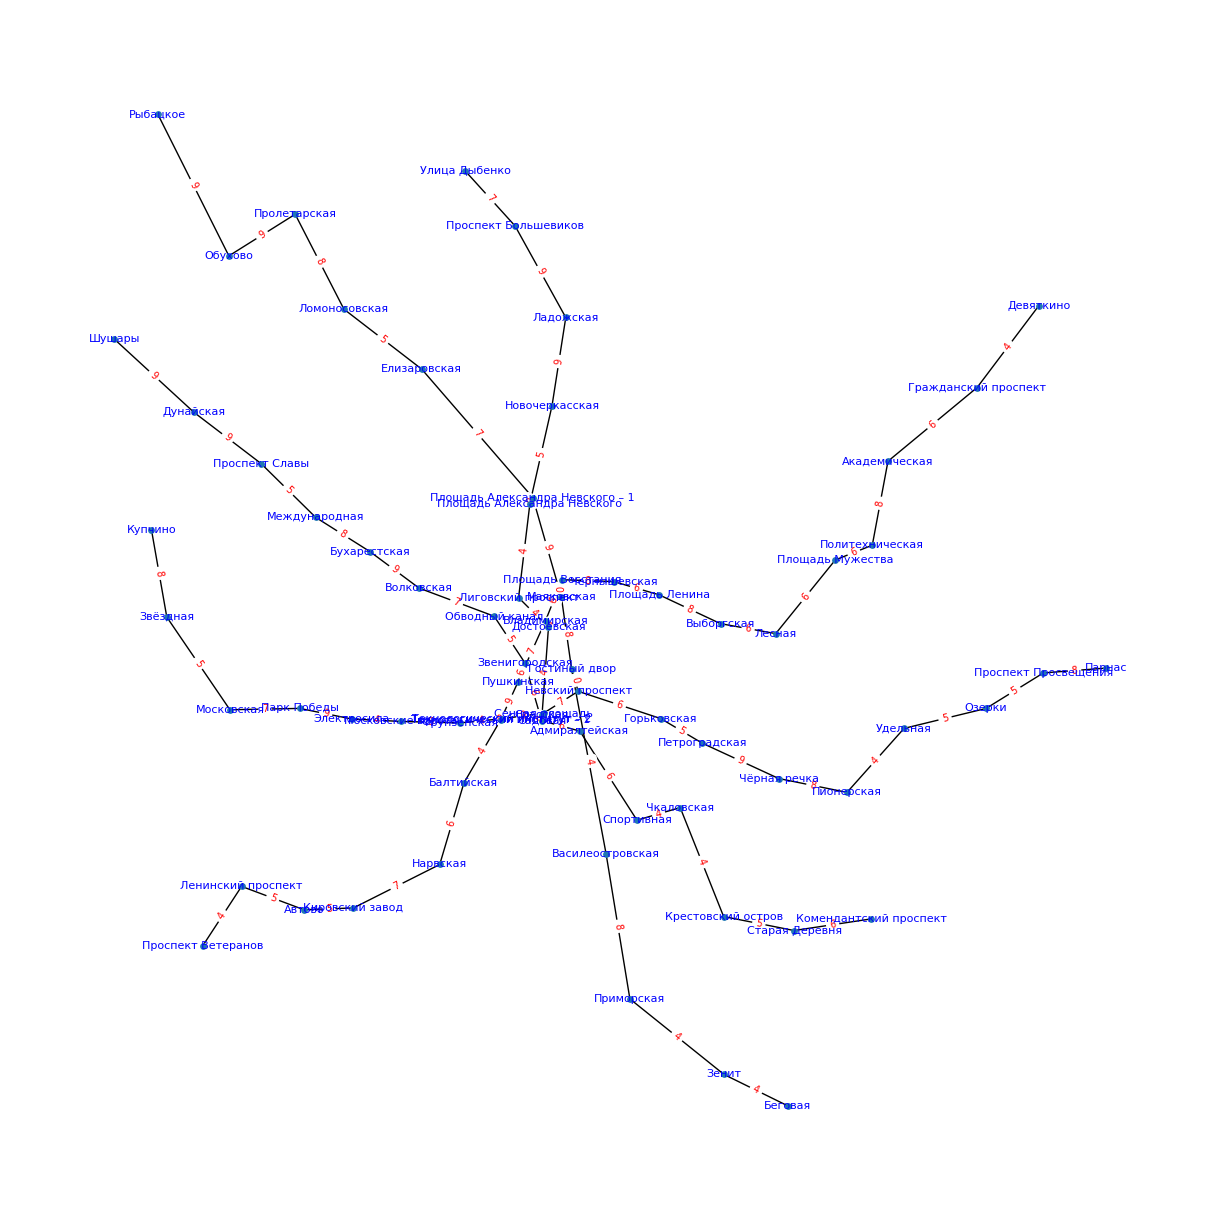

In [31]:
metro_graph = nx.Graph()

# Добавляем вершины графа
for station in all_stations["station"]:
    metro_graph.add_node(station["name"], pos=station["latlon"])

# Добавляем рёбра и веса
metro_graph.add_edges_from(metro_edges)

for u, v in metro_graph.edges():
  # генерация времени передвижения между станциями от 4 до 9 минут
  metro_graph[u][v]['weight'] = random.randint(4, 9)
  # пересадки обнуляем по весам
  if [u, v] in exchanges:
    metro_graph[u][v]['weight'] = 0

edge_labels = nx.get_edge_attributes(metro_graph, "weight")

# Рисуем граф
plt.figure(figsize=(12, 12))
pos = nx.get_node_attributes(metro_graph, 'pos')

nx.draw(metro_graph, pos, with_labels=True, node_size=15, font_weight="light", font_color="blue", font_size=8)
nx.draw_networkx_edge_labels(metro_graph, pos=pos, edge_labels=edge_labels, font_color="red", font_size=7)

plt.show()

Архитектура графа была реализована с помощью реальных координат размещения станций метро Санкт-Петербурга, взятых из открытого источника.

В качестве весов был реализован принцип взятия рандомного числа из диапазона времени от 4 до 9 минут включительно.

Также были учтены пересадки между станциями и помечены временным расстоянием.

## Задание № 4

Разместить на станциях метро минимальное количество точек общепита таким образом, чтобы до клиента, находящегося на любой станции метро, продукты были доставлены курьерской службой не более чем за 25 мин.

Реализуем алгоритм построения минимального остовного дерева с целью дальнейшего применения алгоритмов библиотеки NetworkX в рамках решения задачи Коммивояжера.

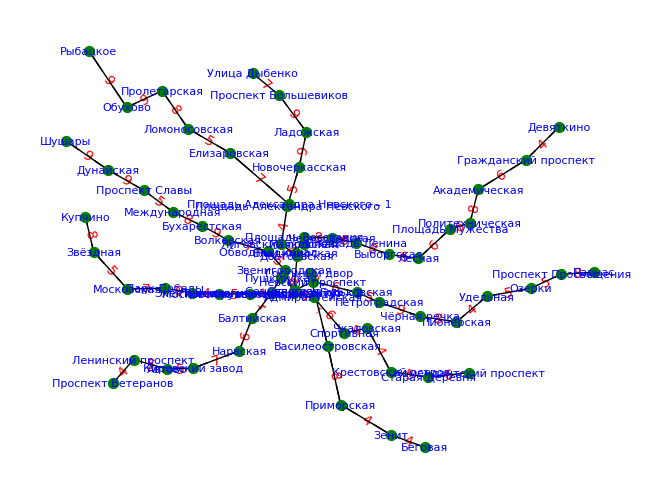

In [62]:
# Вычисляем минимальное остовное дерево
point_graph=nx.minimum_spanning_tree(metro_graph)

nx.draw(point_graph, pos, with_labels=True, node_size=15, font_weight="light", font_color="blue", font_size=8)
nx.draw_networkx_edge_labels(point_graph, pos=pos, edge_labels=nx.get_edge_attributes(point_graph, "weight"), font_color="red")

nx.draw(point_graph, nx.get_node_attributes(point_graph, 'pos'), node_size=50, node_color="green")

plt.show()

In [63]:
print(len(list(point_graph.nodes())))
print(point_graph)

72
Graph with 72 nodes and 71 edges


In [65]:
sum_weight = sum([point_graph[u][v]['weight'] for u, v in point_graph.edges()])

nodes = [i for i in point_graph.edges()]
path = nx.shortest_path(point_graph, nodes[0][0], nodes[-1][-1])

for i in range(len(path)-1):
    u, v = path[i], path[i+1]
    weight = point_graph.get_edge_data(u, v)['weight']

print(f"Сумма весов минимального остовного дерева равна {sum_weight}")

Сумма весов минимального остовного дерева равна 402


Узнав структуру и сумму весов минимального остовного дерева переходим к нахождению оптимального пути с учётом доп условий из задачи расстановки точек общепита (время доставки заказа не позднее N минут).

In [36]:
# Ищем оптимальный путь который затронет все вершины (задача Коммивояжера)
tsp = traveling_salesman_problem(point_graph, weight="weight", cycle=False)

# Считываем вершины по порогу
def find_optimal_points(threshold):
    
    # дистанция в минутах
    total_distance = 0 
    points = []
    
    for i in range(len(tsp) - 1):
        distance = point_graph[tsp[i]][tsp[i+1]]["weight"]
        total_distance += distance
        if total_distance > threshold:
            total_distance = 0
            points.append((tsp[i-1]))
    
    return points

points = find_optimal_points(25)
print(f"Минимальное число торговых точек: {len(points)}")

Минимальное число торговых точек: 23


Получаем, что в лучшем исходе при минимальном остовном дереве можно будет по структуре метро Санкт-Петербурга распланировать стройку 23 точек общепита, что уже неплохо!

## Задания № 5-6

5. Проанализировать изменения по количеству точек общепита и их размещении на графе метро при изменении (увеличении/уменьшении) времени доставки продуктов на 7 мин., 10 мин., 15 мин.
6. Визуализировать проведенный анализ на построенном графе метро.

In [69]:
result_df = pd.DataFrame(columns=["Порог времени", "Минимальное кол-во точек"])

Создав датафрейм для финального отображения динамики точек общепита и условия максимальной по времени доставки заказа, инициализируем общую функцию, которая будет выполнять уже для исходного нашего графа метро задачу нахождения минимального количества точек общепита с входным временным условием:

Минимальное число торговых точек (при условии, что <= 25 мин.): 23 points


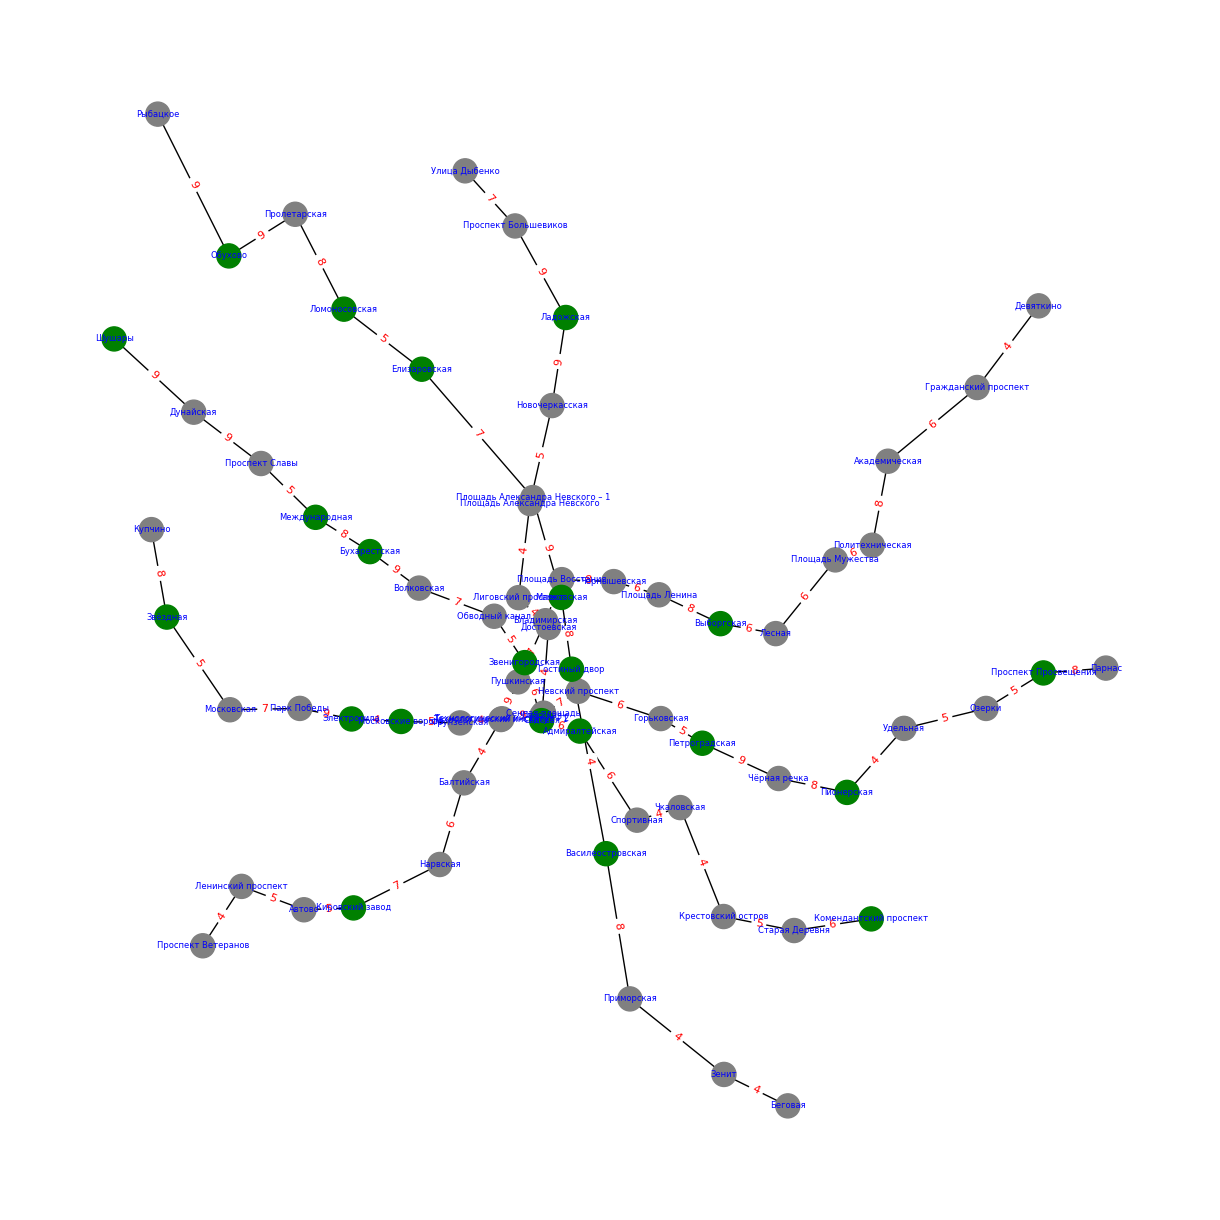

In [70]:
def show_graph(threshold):
    points = find_optimal_points(threshold)
    node_colors = ["green" if node in points else "grey" for node in metro_graph.nodes()]
    print(f"Минимальное число торговых точек (при условии, что <= {threshold} мин.): {len(points)} points")
    result_df.loc[len(result_df)] = {"Порог времени": threshold, "Минимальное кол-во точек": len(points)}
    plt.figure(figsize=(12, 12))

    nx.draw(metro_graph, pos, with_labels=True, font_weight="light", font_color="blue", font_size=6, node_color=node_colors)
    nx.draw_networkx_edge_labels(metro_graph, pos=pos, edge_labels=edge_labels, font_color="red", font_size=8)

    plt.show()

show_graph(25)

При условии в 25 минут мы получаем всё тот же результат, что и с минимальным остовным деревом — 23 точки общепита!

Минимальное число торговых точек (при условии, что <= 30 мин.): 20 points


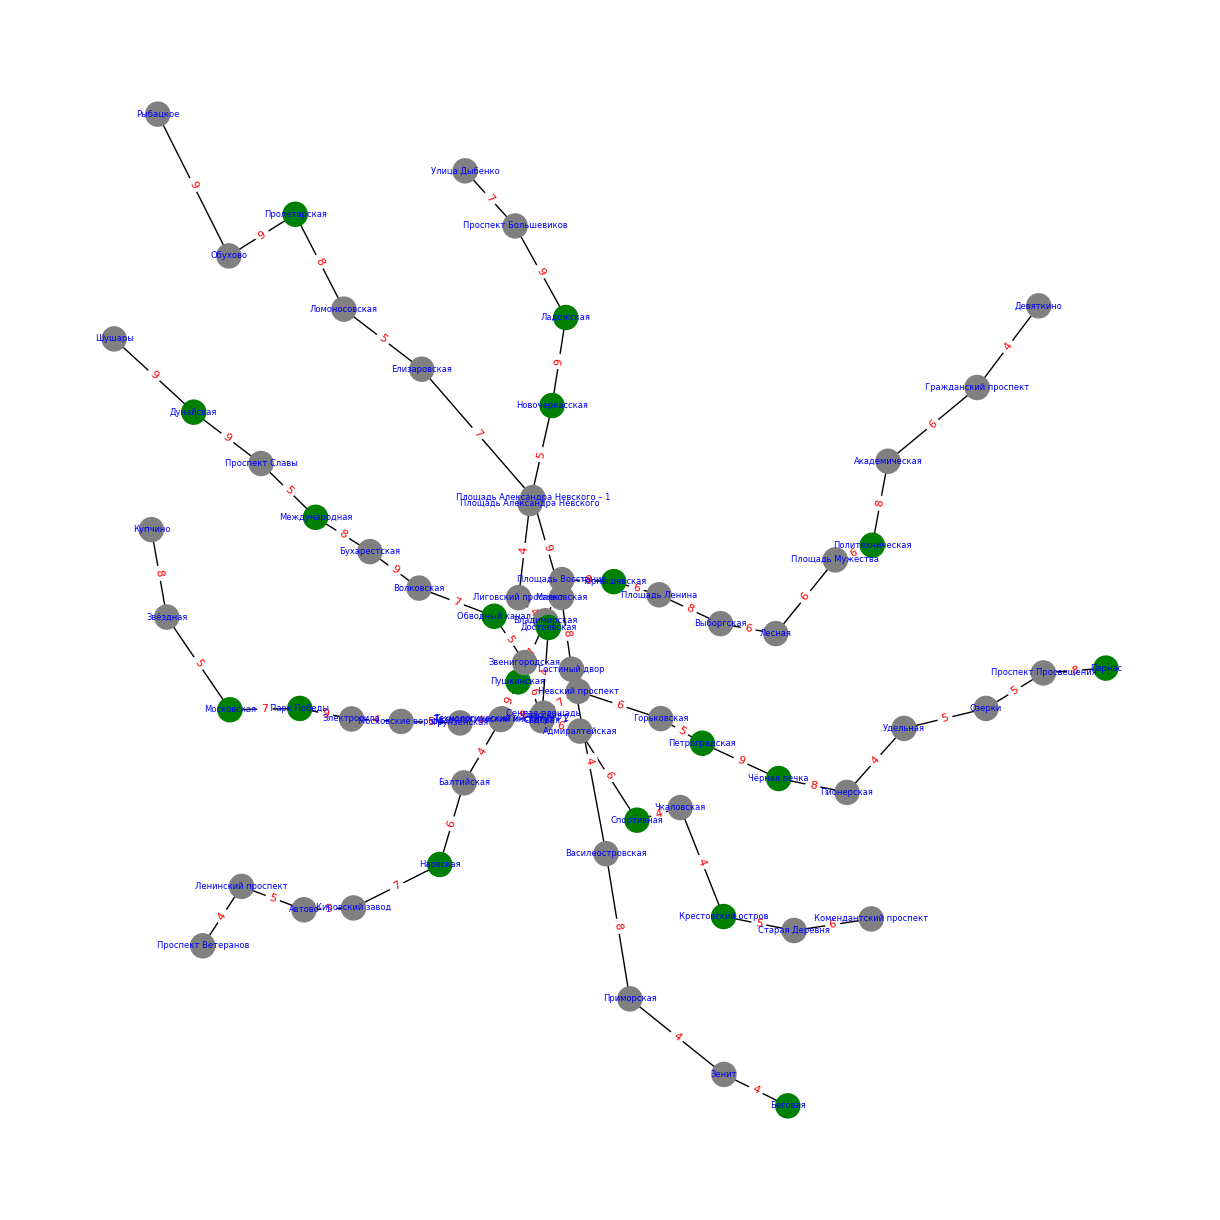

In [71]:
show_graph(30)

При 30 минутах количество постепенно уменьшается — 20 точек общепита.

Минимальное число торговых точек (при условии, что <= 35 мин.): 17 points


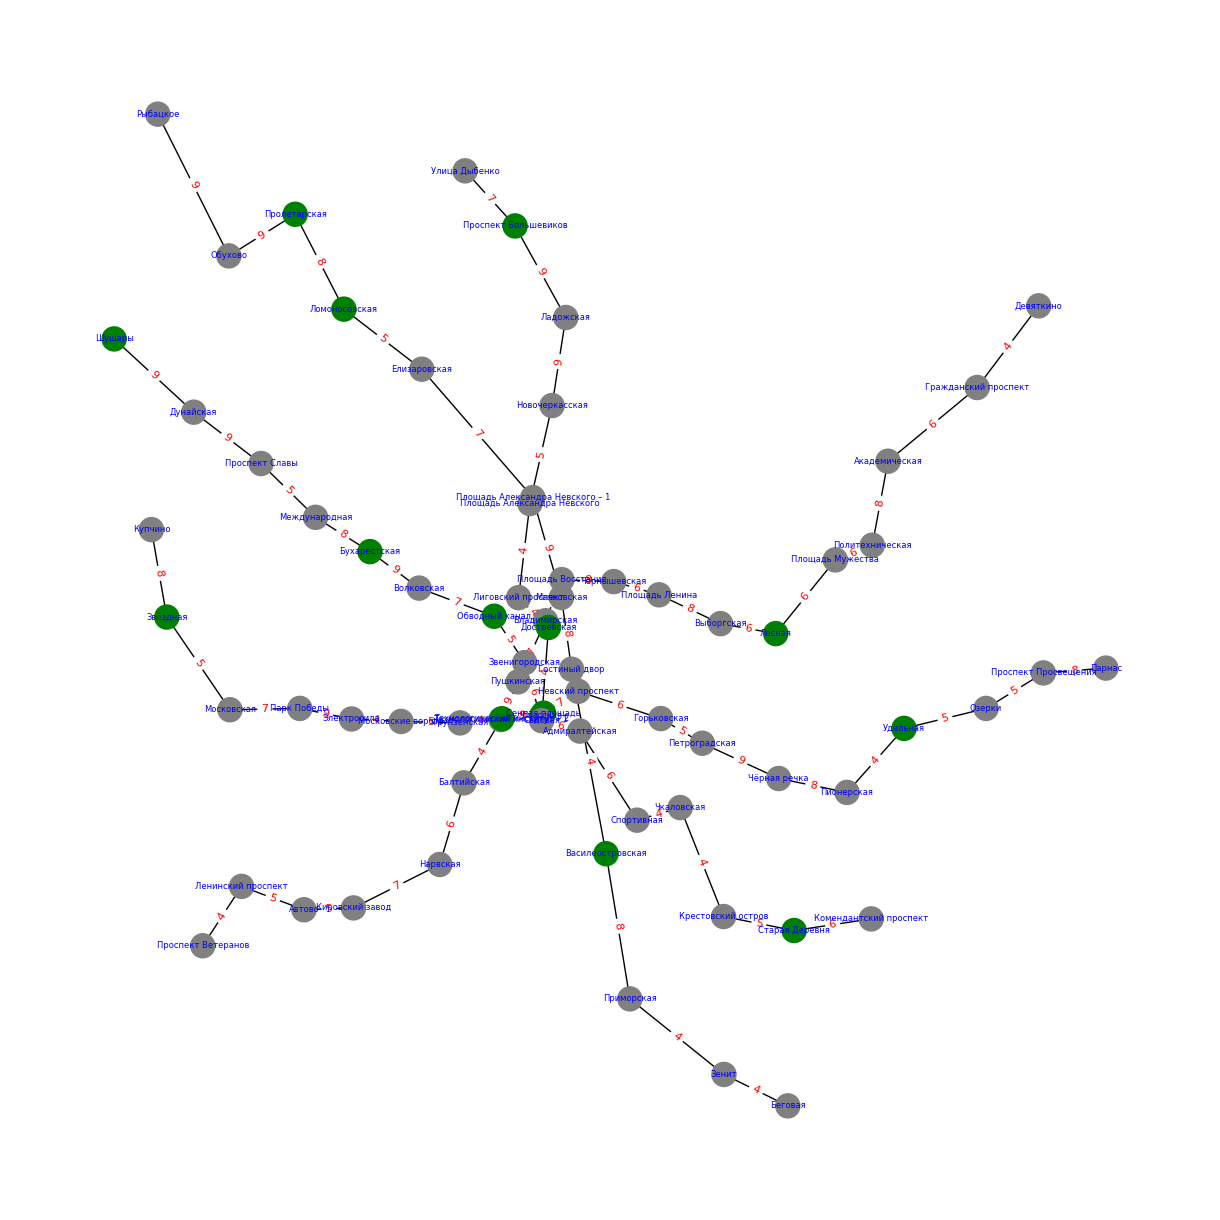

In [72]:
show_graph(35)

В случае с 35 минутами уже 17 точек общепита.

Минимальное число торговых точек (при условии, что <= 40 мин.): 15 points


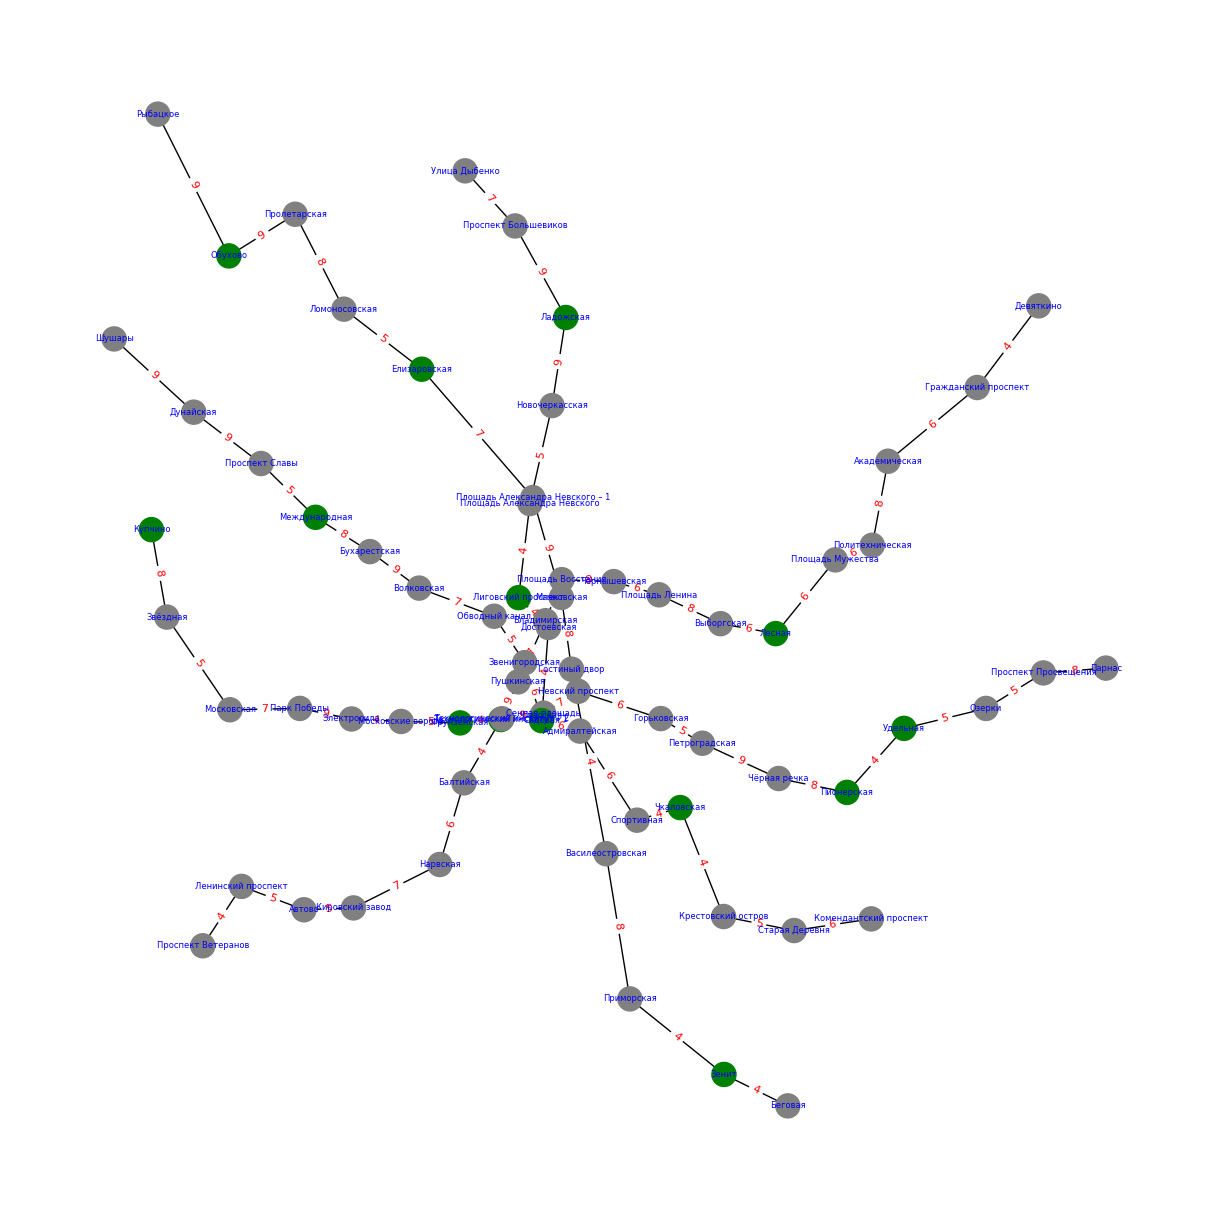

In [73]:
show_graph(40)

При 40 минутах минимально возможное количество точек общепита равно 15.

Минимальное число торговых точек (при условии, что <= 45 мин.): 13 points


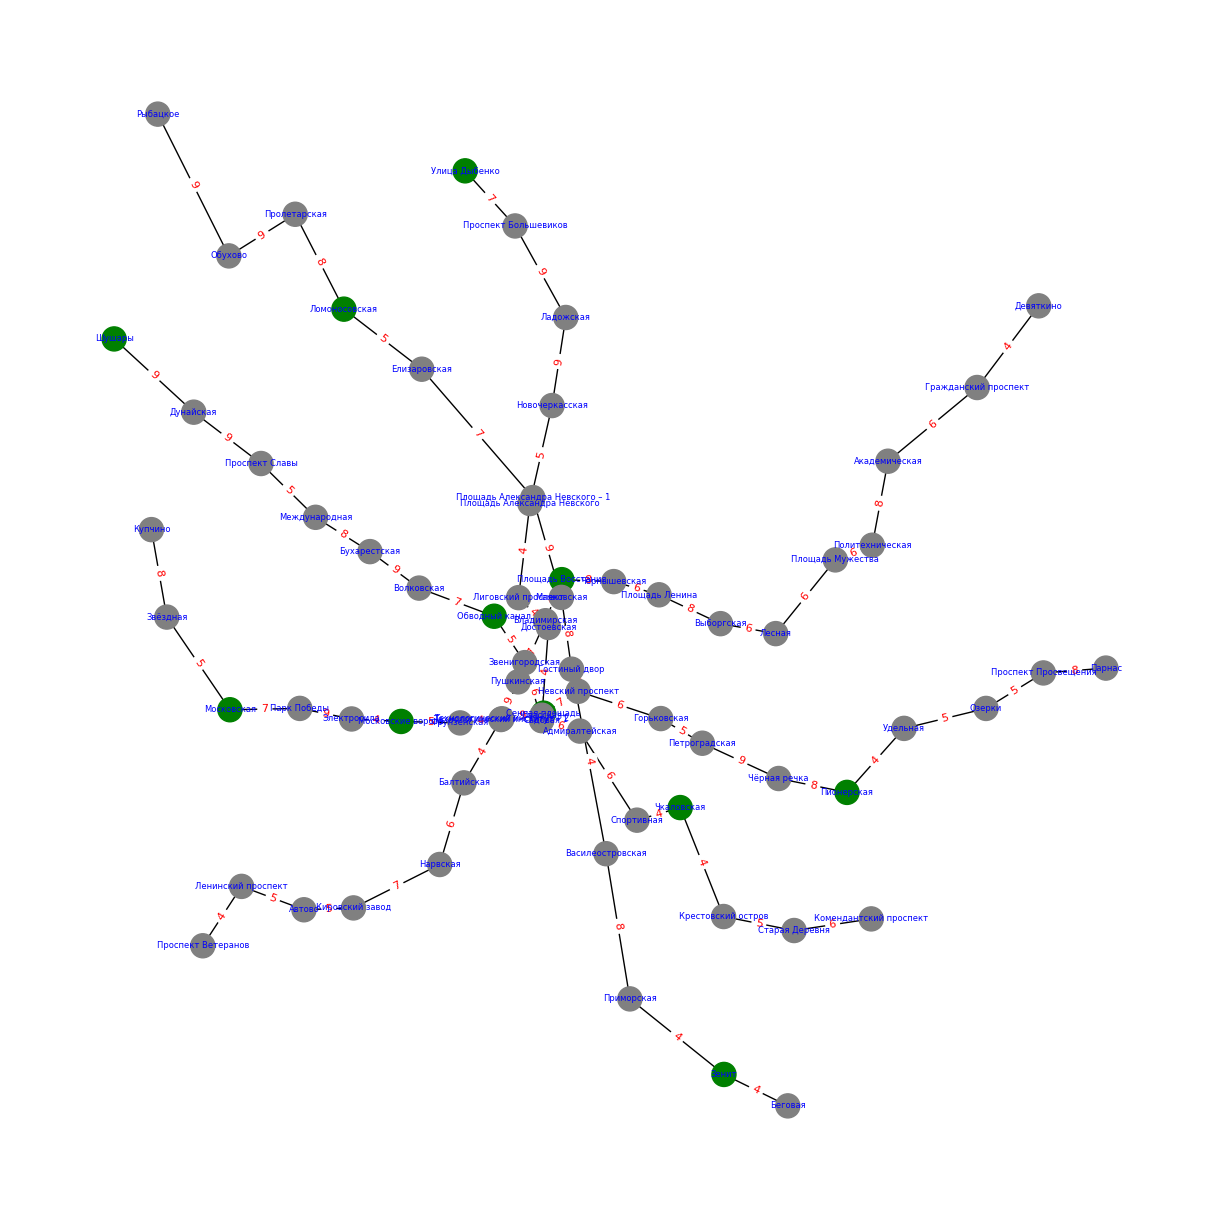

In [74]:
show_graph(45)

При 45 минутах этот показатель уменьшается до 13 точек общепита.

Минимальное число торговых точек (при условии, что <= 50 мин.): 12 points


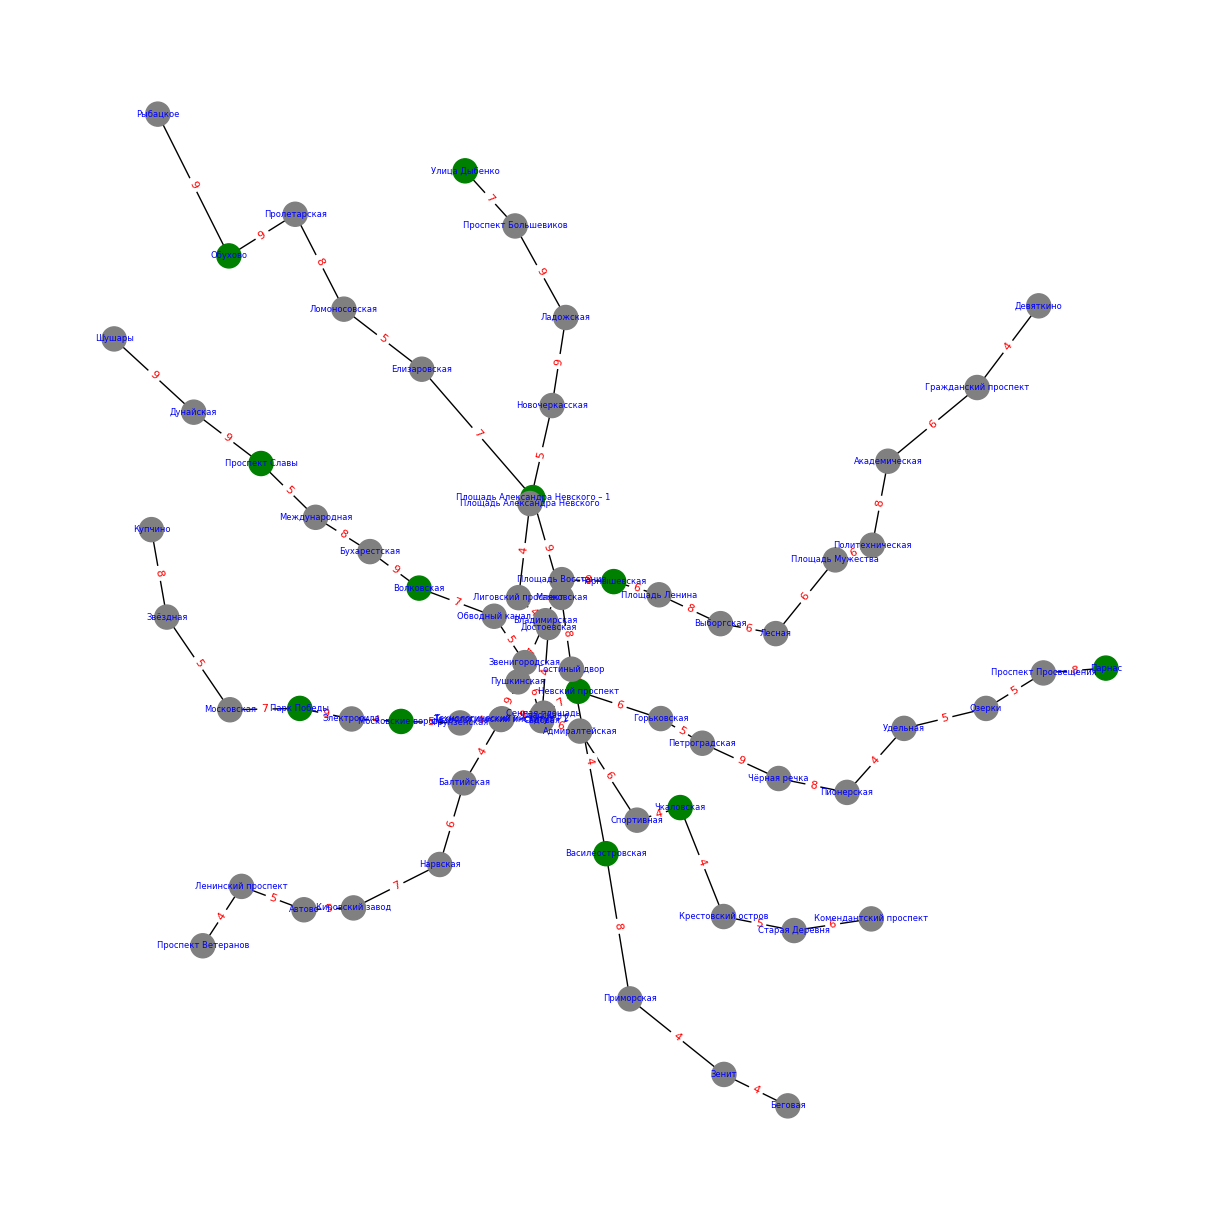

In [75]:
show_graph(50)

Уже при 50 минутах показатель дошёл до 12 точек общепита.

Минимальное число торговых точек (при условии, что <= 20 мин.): 28 points


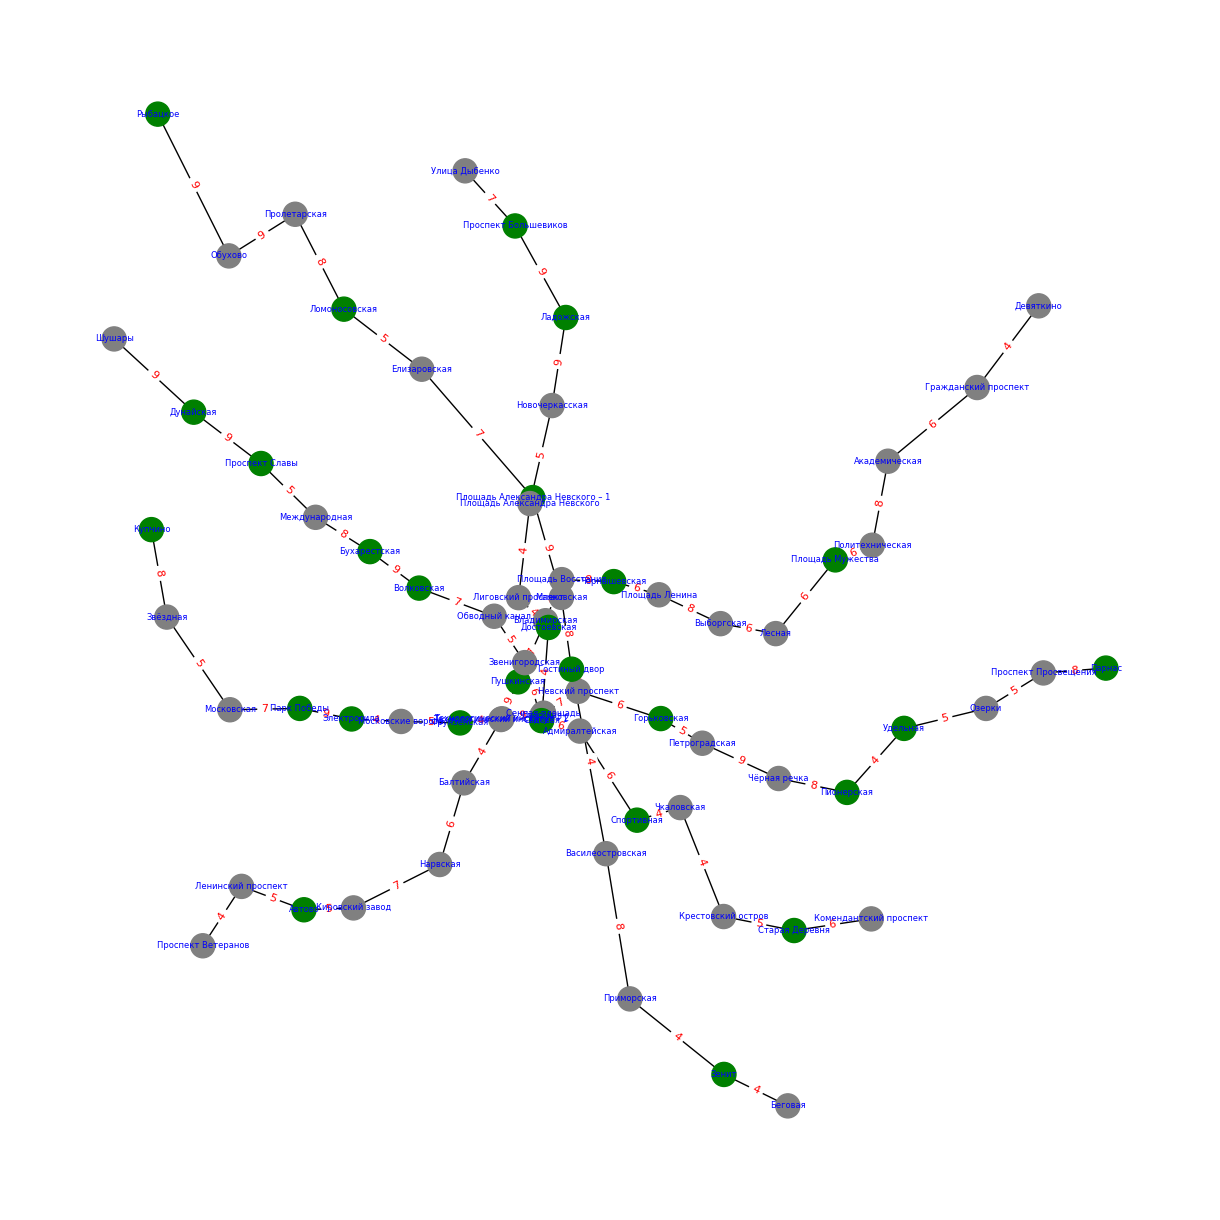

In [76]:
show_graph(20)

Уменьшив значительно временной критерий, получаем 28 потенциальных точек общепита!

Минимальное число торговых точек (при условии, что <= 15 мин.): 34 points


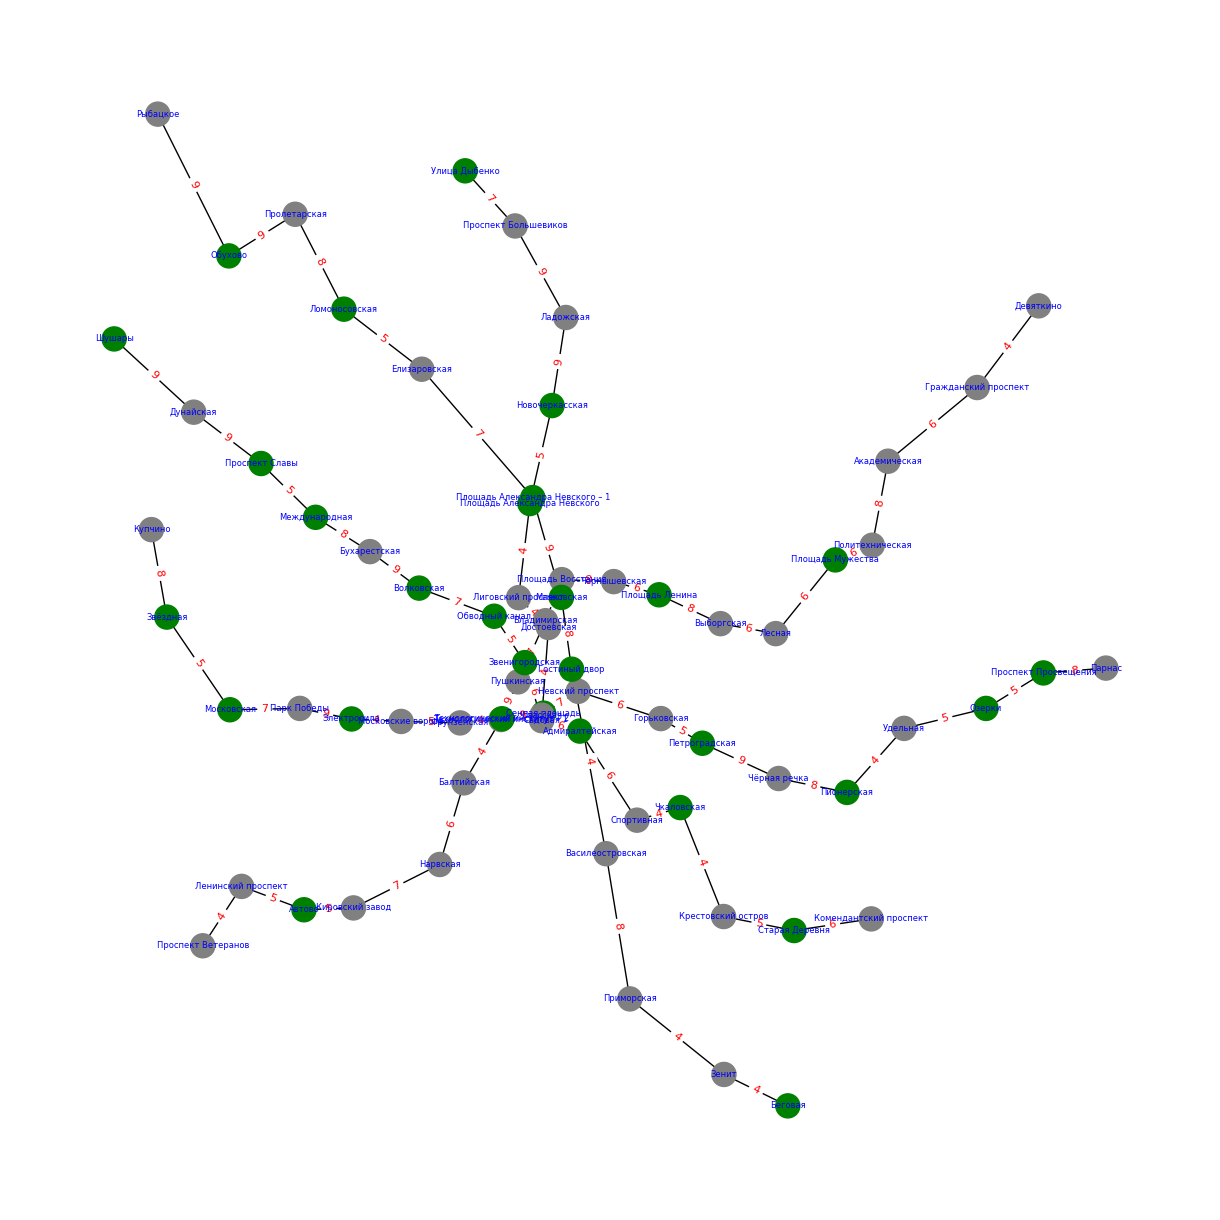

In [77]:
show_graph(15)

При 15 минутах число резко возросло до 34 точек общепита!

Минимальное число торговых точек (при условии, что <= 10 мин.): 48 points


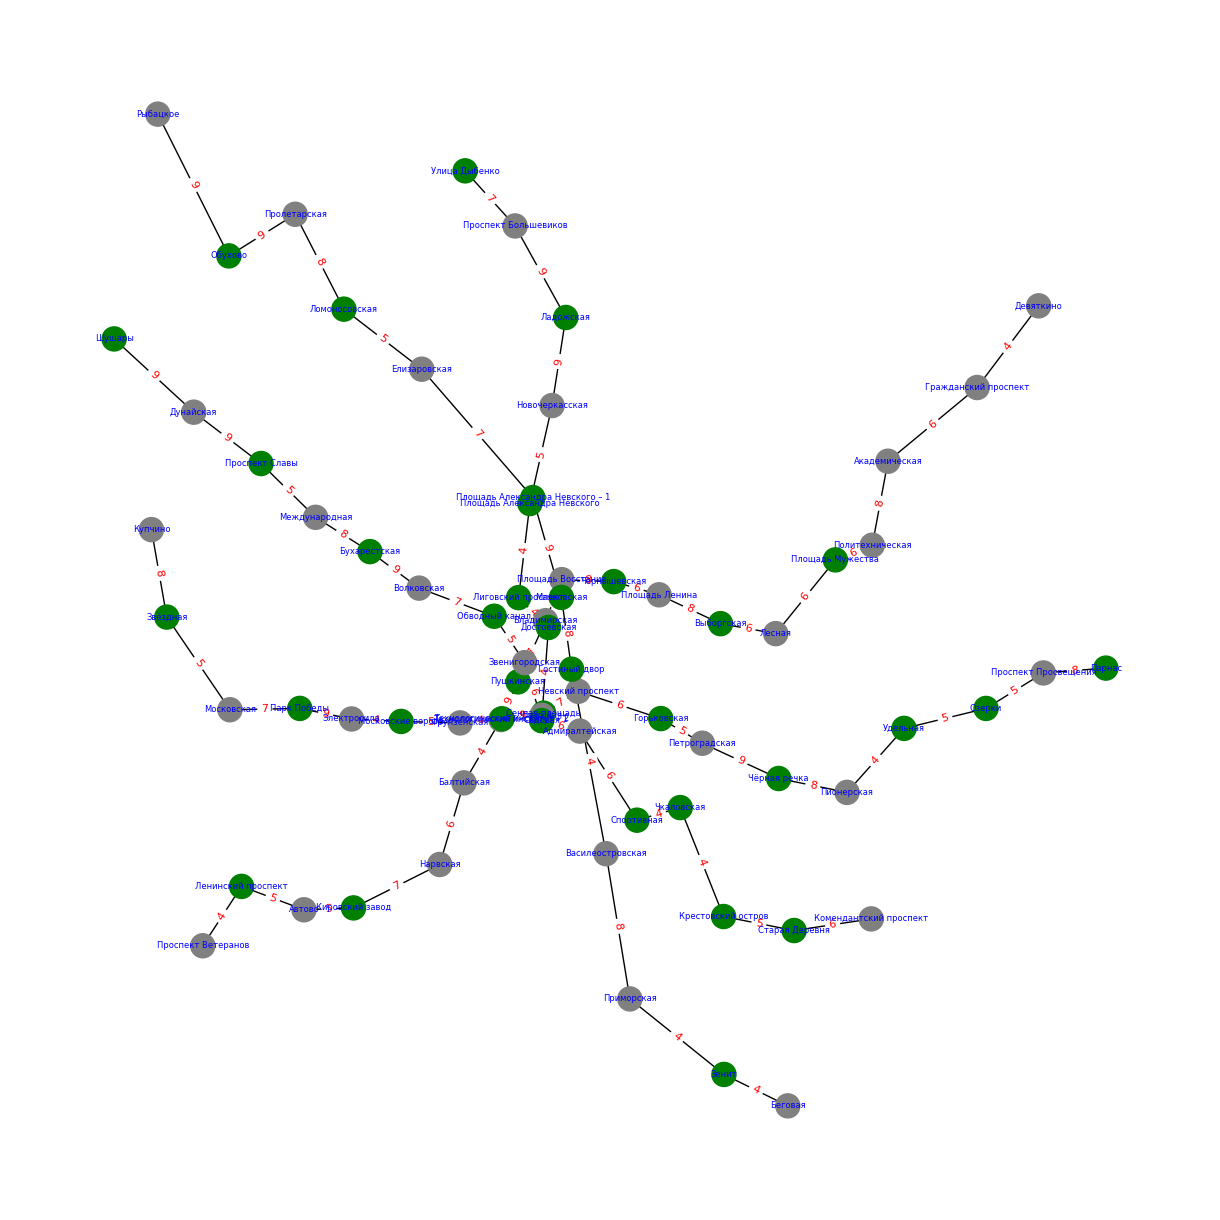

In [78]:
show_graph(10)

При 10 минутах показатель возрос до 48 точек общепита!

Минимальное число торговых точек (при условии, что <= 7 мин.): 65 points


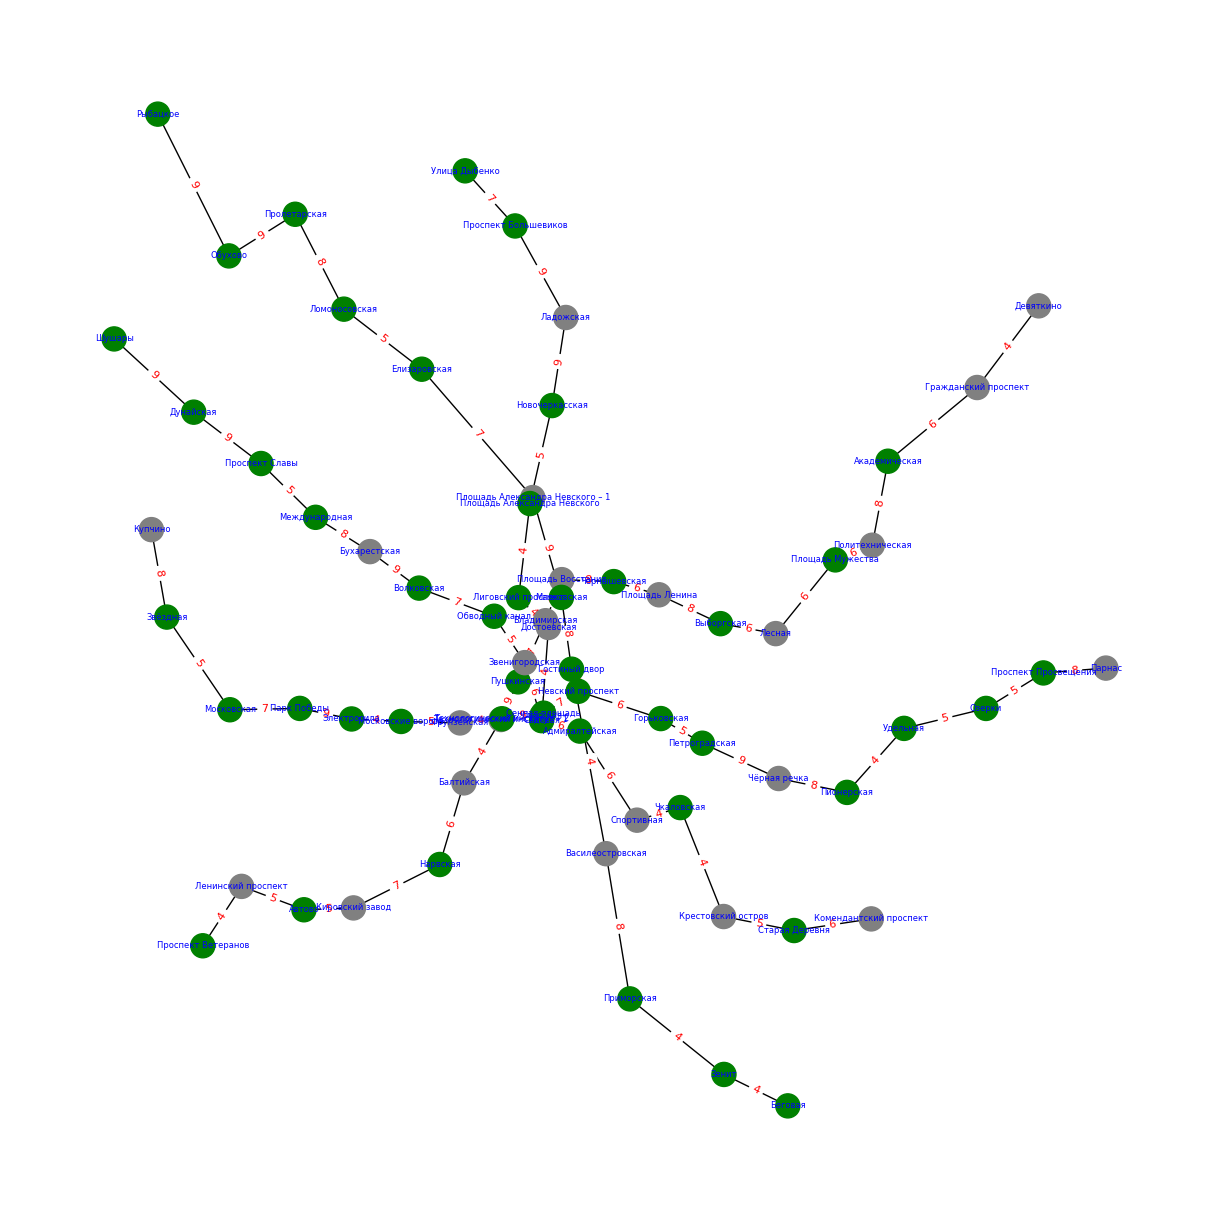

In [79]:
show_graph(7)

При временном условии доставки заказа в 7 минут получаем показатель в 65 точек общепита!

In [80]:
result_df

,Порог времени,Минимальное кол-во точек
0,25,23
1,30,20
2,35,17
3,40,15
4,45,13
5,50,12
6,20,28
7,15,34
8,10,48
9,7,65


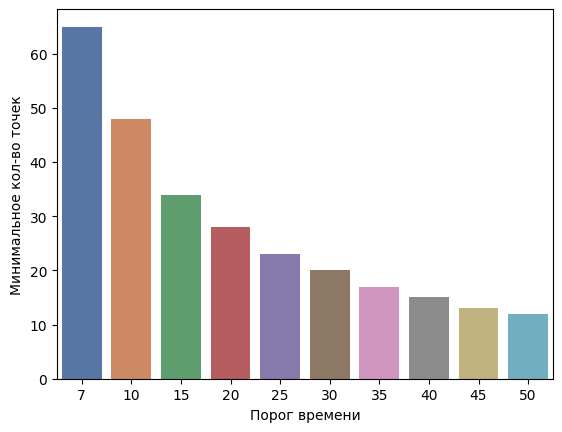

In [81]:
sns.barplot(data=result_df, x="Порог времени", y="Минимальное кол-во точек", palette="deep")
plt.show()

Динамика по графику выше довольно очевидна: чем больше у нас времени на доставку заказа, тем, соответсвенно, меньше нужно будет необходимо точек общепита по структуре метро.

Аналогично эта логика работает в обратную сторону: чем быстрее клиент хочет получить свой заказ продуктов, тем сильнее придётся потратиться бизнесу на открытие большего количества точек общепита для реализации максимально быстрых доставок по Санкт-Петербургу, учитывая всю их структуру метро!